In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import Levenshtein

In [116]:
mannual_df = pd.read_csv('/home/anush/Desktop/flask_name/data_csv/sort_40resume.csv')
code_df = pd.read_csv('/home/anush/Desktop/flask_name/data_csv/Mannual_Resume40 (6).csv')

#mannual_df.tail(5)



In [117]:
#code_df.rename(columns={'Experience Period':'Experience_Period'},inplace=True)
code_df.columns

Index(['Name', 'Email', 'Mobile', 'Skills', 'Experience Period', 'Experience ',
       'Education', 'Location', 'Country', 'Region', 'City',
       'Specialist/Certification', 'Interest'],
      dtype='object')

In [118]:
mannual_df.columns

Index(['Name', 'Email', 'Mobile', 'Skills', 'Designation', 'Experience Period',
       'Education', 'countries', 'regions', 'cities', 'Location',
       'Unnamed: 11', 'Unnamed: 12'],
      dtype='object')

In [119]:
mannual_df

,Name,Email,Mobile,Skills,Designation,Experience Period,Education,countries,regions,cities,Location,Unnamed: 11,Unnamed: 12
0,Jessica Domineck,Jessicadomineck13@gmail.com,954-200-5437,"['protection', 'hiring', 'office', 'd', 'train...","['supervisor', 'store manager', 'appointment s...",7.0,"['EDUCATION\nAtlantic Technical College, Ft. L...",[],[],"['Lauderdale', 'North Miami']","['Lauderdale', ""North Miami'""]",NaN,NaN
1,CHRISTINE M,cnelson430@gmail.com,(772) 979-6868,"['office', 'time management', 'pest', 'sheets'...","['administrative assistant', 'office manager']",11.0,['Nan'],[],['Nelson'],"['Nelson', 'Palm City', 'Port Saint Lucie', 'S...","[""Palm City'"", 'Port Saint']",NaN,NaN
2,NaN,Analeciam22@gmail.com,954-404-3789,"['office', 'reliability', 'studio', 'time mana...","['customer service representative', 'service r...",0.0,['Nan'],[],[],"['Fort Lauderdale', 'Moore']","[""Fort Lauderdale'""]",NaN,NaN
3,_GoBack]Ashley,A_goupee90@outlook.com,772-418-3579,"['Type 50-80 wpm', 'Advanced in Microsoft offi...","['supervisor', 'administration assistant', 'fr...",5.0,['Nan'],[],[],[],[],NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,772-200-9799,"['travel', 'conducting', 'accounts payable', '...","['part time', 'administrative assistant', 'off...",0.0,['EDUCATION: \nSt James Academy High School \...,[],[],"['Sales', 'Part']",[],NaN,NaN
6,Carol James,jennifercj57@hotmail.com,NaN,"['organization', 'strong leader ship', 'Good C...","['ward clerk', 'scheduling coordinator', 'qual...",5.0,['Nan'],[],[],[],[],NaN,NaN
7,CAROLINA NARBUTAS,carolinanarbutas@gmail.com,973-862-9739,"['Reliable', ' punctual and honest person', 'G...","['office manager', 'property manager', 'real e...",0.0,['EDUCATION \n\nDECEMBER 2015 \nREAL ESTATE AG...,['MEXICO'],['Florida'],"['Mexico', 'Stuart', 'Carolina', 'Florida', 'R...","['Mexico', 'Carolina', 'Florida']",NaN,NaN
8,CECILIA MORALES,Ceci.1313@live.com,772-209-1327,"'Â· MS Windows proficient', 'Â· Fluent in Span...","'insurance agent', 'representative', 'vice pre...",7.0,['EDUCATION & CERTIFICATIONS\n\nFEBRUARY 2019 ...,[],"['Florida', 'West', 'Federal']","['Law', 'Stuart', 'West', 'Spanish', 'Florida'...","['Spanish', 'Florida']",'Law' 'Stuart' 'West' 'Spanish' 'Florida' 'Cec...,"insurance agent', 'representative', 'vice pres..."
9,Christine Colangelo,christineleecolangelo@gmail.com,(772) 444.5944,"['â— Types 80+ WPM', 'â— Received 17 Certifi...","['office manager', 'long term', 'owner', 'ware...",10.0,"['EDUCATION\xa0\n\nPSLHS, Port Saint Lucie \n\...",[],[],"['Port Saint Lucie', 'Christine']",['Port Saint'],NaN,NaN


# cosine similarity 1

In [123]:
# create count_vector function
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
col_name = 'Email'
num_lst = []
# x = cosine_similarity(count_matrix)[1][0] * 100
# m = str(mannual_df['Mobile']).replace('\[\]','')

Name = []
Email = []
Skills = []
Experience = []
Education = []
Location = []

# count_vector
def my_count_vector(text):
    cv = CountVectorizer()
    count_matrix = cv.fit_transform(text)
    return count_matrix

# cosine similarity

def my_textO_similarity(count_matrix):
    #print(cosine_similarity(count_matrix))
    x = cosine_similarity(count_matrix)[1][0] * 100
    return x
for i in ['Name','Mobile','Email','Experience Period','Skills','Education','Location']:
    
    mannual = str(mannual_df[f'{i}']).replace('\[\]','')
    code = str(code_df[f'{i}']).replace('\[\]','')
    text = [mannual,code]

    count_matrix = my_count_vector(text)
    x=my_textO_similarity(count_matrix)

    result_name = ('{}'.format(x))
    num_lst.append(result_name)

n= num_lst
num_lst = pd.to_numeric(n)
num_lst

array([82.57812728, 92.62400967, 99.60684719, 83.06725568, 65.07202543,
       44.13674587, 49.39663706])

In [121]:
# # create count_vector function [test code]
# from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.metrics.pairwise import cosine_similarity
# col_name = 'Email'
# num_lst = []
# # x = cosine_similarity(count_matrix)[1][0] * 100
# # m = str(mannual_df['Mobile']).replace('\[\]','')

# Name = []num_lst 
# Email = []
# Skills = []
# Experience = []
# Education = []
# Location = []

# # count_vector
# def my_count_vector(text):
#     cv = CountVectorizer()
#     count_matrix = cv.fit_transform(text)
#     return count_matrix

# # cosine similarity

# def my_textO_similarity(count_matrix):
#     #print(cosine_similarity(count_matrix))
#     x = cosine_similarity(count_matrix)[1][0] * 100
#     return x
    
# mannual = str(mannual_df['citi']).replace('\[\]','')
# code = str(code_df['Location']).replace('\[\]','')
# text = [mannual,code]

# count_matrix = my_count_vector(text)
# x=my_textO_similarity(count_matrix)

# result_name = ('Location = {}'.format(x))
# num_lst.append(result_name)

num_lst  

array([82.57812728, 92.62400967, 99.60684719, 65.07202543, 44.13674587,
       49.39663706])

# ground truth visualization 


In [90]:
# table = pd.DataFrame({
# ('Manual Resume', 'Name'): {('Extracted Resume', 'Name'): 82.57, ('Extracted Resume', 'Email'): 0},
# ('Manual Resume', 'Email'): {('Extracted Resume', 'Name'): 0, ('Extracted Resume', 'Email'): 99.60},
# ('Manual Resume', 'Mobile'): {('Extracted Resume', 'Name'): 0, ('Extracted Resume', 'Email'): 0, ('Extracted Resume', 'Mobile'): 92.62},
# ('Manual Resume', 'Skills'): {('Extracted Resume', 'Name'): 0, ('Extracted Resume', 'Email'): 0, ('Extracted Resume', 'Mobile'): 0,('Extracted Resume','Skills'):66.00},
# ('Manual Resume', 'Education'): {('Extracted Resume', 'Name'): 0, ('Extracted Resume', 'Email'): 0, ('Extracted Resume', 'Mobile'): 0,('Extracted Resume','Skills'):0,('Extracted Resume','Education'):44.13},
# ('Manual Resume', 'Location'): {('Extracted Resume', 'Name'): 0, ('Extracted Resume', 'Email'): 0, ('Extracted Resume', 'Mobile'): 0,('Extracted Resume','Skills'):0,('Extracted Resume','Education'):0,('Extracted Resume','Location'):49.23},
    
#     })('Manual Resume', 'Location'): {('Name'): 0, ('Email'): 0, ('Mobile'): 0,('Skills'):0,('Education'):0,('Location'):49.23},


table = pd.DataFrame({
('Manual Resume', 'Name'): {('Name'):num_lst[0], ('Email'):0},
('Manual Resume', 'Email'): {('Name'): 0, ('Email'):num_lst[2]},
('Manual Resume', 'Mobile'): {('Name'): 0, ('Email'): 0, ('Mobile'):num_lst[1]},
('Manual Resume', 'Skills'): {('Name'): 0, ('Email'): 0, ('Mobile'): 0,('Skills'):num_lst[4]},
('Manual Resume', 'Education'): {('Name'): 0, ('Email'): 0, ('Mobile'): 0,('Skills'):0,('Education'):num_lst[5]},
('Manual Resume', 'Location'): {('Name'): 0, ('Email'): 0, ('Mobile'): 0,('Skills'):0,('Education'):0,('Location'):num_lst[6]},
('Manual Resume', 'Experience_Period'): {('Name'): 0, ('Email'): 0, ('Mobile'): 0,('Skills'):0,('Education'):0,('Location'):0,('Experience_Period'):num_lst[3]},
    
    })

table

Manual Resume                                             \
                           Name      Email    Mobile     Skills  Education   
Name                  82.578127   0.000000   0.00000   0.000000   0.000000   
Email                  0.000000  99.606847   0.00000   0.000000   0.000000   
Mobile                      NaN        NaN  92.62401   0.000000   0.000000   
Skills                      NaN        NaN       NaN  65.072025   0.000000   
Education                   NaN        NaN       NaN        NaN  44.136746   
Location                    NaN        NaN       NaN        NaN        NaN   
Experience_Period           NaN        NaN       NaN        NaN        NaN   

                                                
                    Location Experience_Period  
Name                0.000000          0.000000  
Email               0.000000          0.000000  
Mobile              0.000000          0.000000  
Skills              0.000000          0.000000  
Education           0.000000          0.000000  
Location           48.680192          0.000000  
Experience_Period        NaN         82.928843

In [91]:
# def _color_red_or_green(val):
#     color = 'red' if val < 40 else 'green'
#     return 'color: %s' % color

# table.style.applymap(_color_red_or_green)

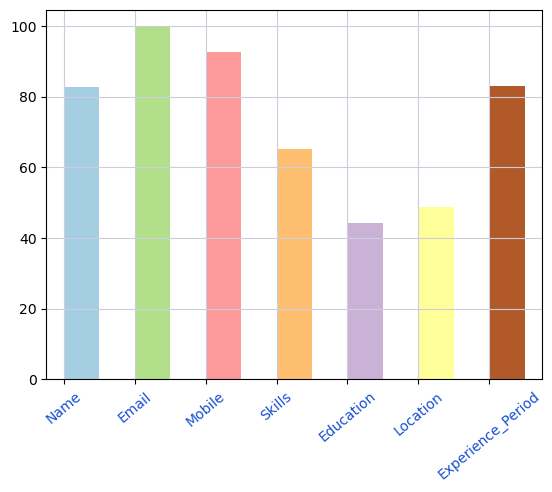

In [92]:
# bar chart
table.plot.bar(legend='',colormap='Paired',stacked=True,align='edge')
#plt.title('Similarity rate between Ground truth and Resume_Parse files',color='#164ddd',fontsize=12)
plt.xticks(rotation=40,color='#164dd5')
plt.grid(color='#cccddd',which='major')
plt.show()